    Problem Statement:

You are provided with the marketing spend data of an online advertising firm who are looking to optimize their cost spend on ads while increasing their yield in

terms of marketing goals.

    Objective:

Analyze the data and find actionable insights in the given data, come up with

strategies that use Data Science and AI techniques to optimize their marketing

spends for maximum yield. Dataset link - [Link to the dataset](https://www.kaggle.com/datasets/naniruddhan/online-advertising-digital-marketing-data?select=online_advertising_performance_data.csv)



Tasks to be Performed:

1. Preprocess the data for feature selection and feature engineering

2. Analyze the data for actionable insights by end to end Exploratory Data Analysis

3. Perform statistical analysis both Descriptive and Inferential for higher level insights

4. Devise a strategy and machine learning model that will solve the business problem.

# Import Libraries

In [2]:
#pip install duckdb

In [3]:
import pandas as pd

import duckdb as db

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Connect to DuckDB

con = db.connect()

# Data Dicitionary

In [4]:
f = open("/kaggle/input/online-advertising-digital-marketing-data/Online Advertising Performance Data.txt", "r")

print(f.read())


Online Advertising Performance Data

The dataset provides insights into the online advertising performance of a company, referred to as "Company X", from April 1, 2020, to June 30, 2020. The currency used for transactions is the US dollar.

Metrics:

Day: Date of the advertising campaign.
Campaign: A segmentation variable set by Company X to target specific groups of users with advertisements.
User Engagement: Indicates the level of engagement of users targeted by the advertising campaign.
Banner: Represents the size of the ad served by an advertising platform, referred to as "Advert Firm A".
Placement: Denotes the publisher space where the ad is served by "Advert Firm A", such as websites or apps.
Displays: The number of ads served by "Advert Firm A" during the campaign period.
Cost: The price paid by "Advert Firm A" to serve the ads to the publisher. It reflects the placement cost of the advertisements.
Clicks: The number of times users clicked on the advertisements during the campai

# Read Source Data

In [5]:
df = pd.read_csv('/kaggle/input/online-advertising-digital-marketing-data/online_advertising_performance_data.csv')

df.tail()


,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
15403,April,1,camp 1,Low,160 x 600,ghi,16,0.0249,0,0.0000,0,0.0000,NaN,NaN
15404,April,1,camp 1,Low,160 x 600,mno,2234,0.4044,10,1.8347,3,101.7494,NaN,NaN
15405,June,29,camp 1,High,800 x 250,ghi,1,0.0157,0,0.0000,0,0.0000,NaN,NaN
15406,June,29,camp 1,High,800 x 250,mno,4,0.0123,0,0.0000,0,0.0000,NaN,NaN
15407,June,29,camp 3,High,240 x 400,def,1209,0.3184,2,0.1115,3,110.4224,NaN,NaN


# Data Preprocessing

In [6]:
# Check for missing values

print("Missing Values in each column:")

print(df.isnull().sum())

Missing Values in each column:
month                          0
day                            0
campaign_number                0
user_engagement                0
banner                         0
placement                    413
displays                       0
cost                           0
clicks                         0
revenue                        0
post_click_conversions         0
post_click_sales_amount        0
Unnamed: 12                15408
Unnamed: 13                15408
dtype: int64


Added Date attributes

In [7]:
query_01="""

SELECT 2020 as "Campaign Year"

    , month as "Campaign Month"

    , day as "Campaign Day"

    , campaign_number as "Campaign Number"

    , user_engagement as "User Engagement"

    , banner as Banner

    , placement as Placement

    , displays as Displays

    , cost as Cost

    , clicks as Clicks

    , revenue as Revenue

    , post_click_conversions as "Post Click Conversions"

    , post_click_sales_amount as "Post Click Sales Amount"

FROM df

where placement is not null

"""

data = con.execute(query_01).df()



# Print the DataFrame

data.head(10)


,Campaign Year,Campaign Month,Campaign Day,Campaign Number,User Engagement,Banner,Placement,Displays,Cost,Clicks,Revenue,Post Click Conversions,Post Click Sales Amount
0,2020,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000
1,2020,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602
2,2020,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636
3,2020,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234
4,2020,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000
5,2020,April,1,camp 1,Low,160 x 600,ghi,16,0.0249,0,0.0000,0,0.0000
6,2020,April,1,camp 1,Low,160 x 600,mno,2234,0.4044,10,1.8347,3,101.7494
7,2020,April,1,camp 1,Medium,160 x 600,def,2963,1.8899,4,0.7338,4,100.5044
8,2020,April,1,camp 1,Medium,160 x 600,ghi,580,0.9917,9,1.6512,0,0.0000
9,2020,April,1,camp 1,Medium,160 x 600,mno,20152,11.1678,185,33.9397,13,653.1896


# Shape of the dateset

In [8]:
print(f"Shape of the dataset: {data.shape}")

print("++++++++++++++++++++++++++++++++++++")

print(f"Data types of each colummn in the dataset:")

print(data.dtypes)

Shape of the dataset: (14995, 13)
++++++++++++++++++++++++++++++++++++
Data types of each colummn in the dataset:
Campaign Year                int32
Campaign Month              object
Campaign Day                 int64
Campaign Number             object
User Engagement             object
Banner                      object
Placement                   object
Displays                     int64
Cost                       float64
Clicks                       int64
Revenue                    float64
Post Click Conversions       int64
Post Click Sales Amount    float64
dtype: object


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14995 entries, 0 to 14994
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Campaign Year            14995 non-null  int32  
 1   Campaign Month           14995 non-null  object 
 2   Campaign Day             14995 non-null  int64  
 3   Campaign Number          14995 non-null  object 
 4   User Engagement          14995 non-null  object 
 5   Banner                   14995 non-null  object 
 6   Placement                14995 non-null  object 
 7   Displays                 14995 non-null  int64  
 8   Cost                     14995 non-null  float64
 9   Clicks                   14995 non-null  int64  
 10  Revenue                  14995 non-null  float64
 11  Post Click Conversions   14995 non-null  int64  
 12  Post Click Sales Amount  14995 non-null  float64
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 1.4+ MB


# Label and One-hot encoding:

Total Variables in the dataset: 14



Identifying the categorical and continuous variables



Categorical Variables (8): 

1. Campaign Year

2. Campaign Month (eg. April, May, June) ----> One-hot encoding suitable to avoid unintended ordinal relationships

3. Campaign Day

4. Campaign Number (eg. Camp1, Camp2, Camp3) ----> One-hot encoding suitable to avoid unintended ordinal relationships

5. User Engagement (eg. High, Low, Medium) ----> Label Encoding is suitable as there is ordinal relationship between the values.

6. Banner (eg. 160 x 600) ----> One-hot encoding suitable to avoid unintended ordinal relationships

7. Placement (eg. adc, def, fdh) ----> One-hot encoding suitable to avoid unintended ordinal relationships



Continuous Variables (6):

1. Displays

2. Cost

3. Clicks

4. Revenue

5. Post Click Conversions

6. Post Click Sales Amount


In [10]:


columns_to_label_encode = ['User Engagement']

le = LabelEncoder()

for col in columns_to_label_encode:

    data[col] = le.fit_transform(data[col])



print(f"Shape of the dataset before encoding: {data.shape}")





columns_to_onehot_encode = ['Campaign Month','Campaign Number','Banner','Placement']

ohe = OneHotEncoder(sparse_output=False)

encoded_columns = ohe.fit_transform(data[columns_to_onehot_encode])

encoded_df = pd.DataFrame(encoded_columns, columns=ohe.get_feature_names_out(input_features=columns_to_onehot_encode))

data_dropped_cloumns=data.drop(columns=columns_to_onehot_encode)

data_final = pd.concat([data_dropped_cloumns, encoded_df], axis=1) # Concatenate the original DataFrame (without the encoded columns) with the encoded DataFrame



#data_final.head()



print(f"Shape of the dataset after encoding: {data_final.shape}")

#encoded_df.info()

Shape of the dataset before encoding: (14995, 13)
Shape of the dataset after encoding: (14995, 28)


Statistical Summary

In [11]:
data_final.describe()

,Campaign Year,Campaign Day,User Engagement,Displays,Cost,Clicks,Revenue,Post Click Conversions,Post Click Sales Amount,Campaign Month_April,...,Banner_468 x 60,Banner_580 x 400,Banner_670 x 90,Banner_728 x 90,Banner_800 x 250,Placement_abc,Placement_def,Placement_ghi,Placement_jkl,Placement_mno
count,14995.0,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,...,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000
mean,2020.0,15.471957,1.041214,15939.616939,11.683242,166.244215,18.423759,43.465555,2181.756135,0.405202,...,0.126642,0.040413,0.156852,0.185995,0.023941,0.064555,0.235945,0.232344,0.166989,0.300167
std,0.0,8.741317,0.817090,44923.954378,45.950340,737.736875,98.059296,216.491678,10660.989934,0.490947,...,0.332583,0.196934,0.363674,0.389116,0.152871,0.245747,0.424602,0.422341,0.372978,0.458346
min,2020.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,8.000000,0.000000,102.000000,0.030200,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.0,15.000000,1.000000,1336.000000,0.377500,7.000000,0.542300,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2020.0,23.000000,2.000000,9619.000000,2.705250,57.000000,4.000000,3.000000,185.275250,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2020.0,31.000000,2.000000,455986.000000,556.704800,14566.000000,2096.211600,3369.000000,199930.318000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Cross check whether the nulls removed

In [12]:
data_final.isnull().sum()

Campaign Year              0
Campaign Day               0
User Engagement            0
Displays                   0
Cost                       0
Clicks                     0
Revenue                    0
Post Click Conversions     0
Post Click Sales Amount    0
Campaign Month_April       0
Campaign Month_June        0
Campaign Month_May         0
Campaign Number_camp 1     0
Campaign Number_camp 2     0
Campaign Number_camp 3     0
Banner_160 x 600           0
Banner_240 x 400           0
Banner_300 x 250           0
Banner_468 x 60            0
Banner_580 x 400           0
Banner_670 x 90            0
Banner_728 x 90            0
Banner_800 x 250           0
Placement_abc              0
Placement_def              0
Placement_ghi              0
Placement_jkl              0
Placement_mno              0
dtype: int64

# Identify and Remove Outliers

In [13]:
import numpy as np

from scipy.stats import zscore



# Compute Z-scores for numerical columns

z_scores = np.abs(zscore(data_final.select_dtypes(include=[np.number])))



# Set a threshold (e.g., 3 standard deviations)

threshold = 3

outliers = (z_scores > threshold)



# Filter out rows with outliers

data_no_outliers = data_final[~(outliers).any(axis=1)]



print(f"Original Dataset Shape: {data_final.shape}")

print(f"Dataset Shape After Removing Outliers: {data_no_outliers.shape}")


Original Dataset Shape: (14995, 28)
Dataset Shape After Removing Outliers: (12524, 28)


# Use boxplot to verify outliers were removed:

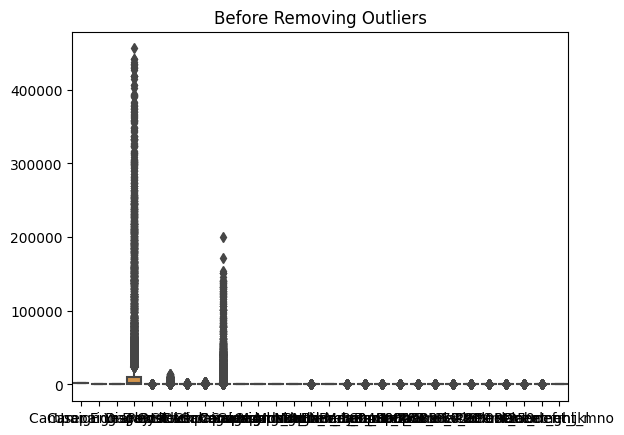

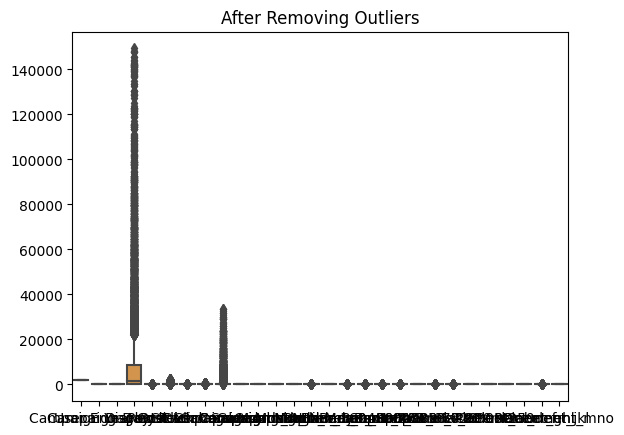

In [14]:
import seaborn as sns

import matplotlib.pyplot as plt



# Boxplot before removing outliers

sns.boxplot(data=data_final)

plt.title("Before Removing Outliers")

plt.show()



# Boxplot after removing outliers

sns.boxplot(data=data_no_outliers)

plt.title("After Removing Outliers")

plt.show()

# Correlation Analysis

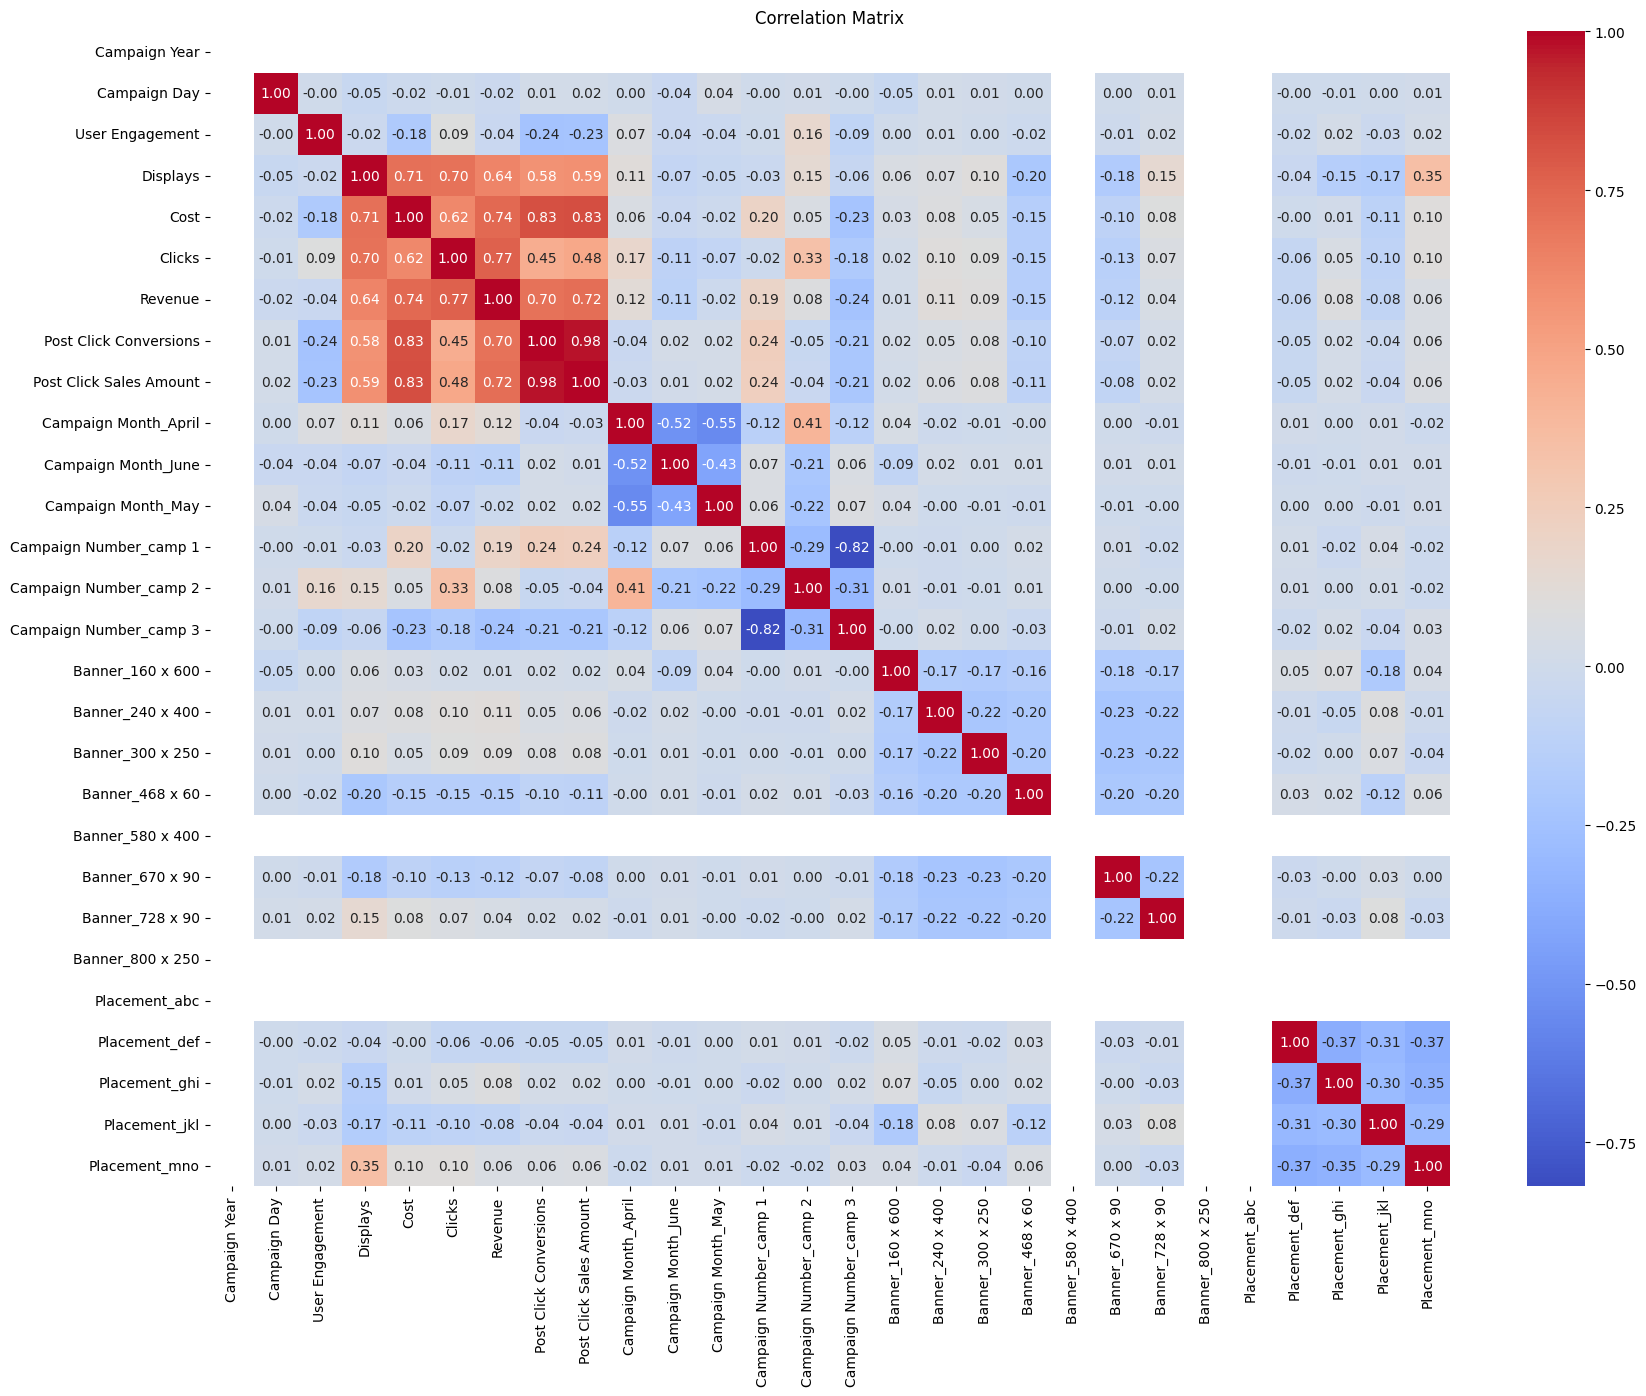

In [15]:




plt.figure(figsize=(20, 15))

# Correlation heatmap

corr = data_no_outliers.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

plt.title('Correlation Matrix')

plt.show()


# Correlation analysis:

1. The independent variables 'campaigns', 'Banner' and 'Placement' do not have greater impact on the target variable, 'Revenue'

2. The independent variable 'Displays', 'Cost', 'Clicks', 'Post Click Conversions', 'Post Click Sales Amount' have greater impact on the target variable, 'Revenue'


In [16]:
# Set benchmark for features correlation significance (20%) with target

corr_features = corr["Revenue"].abs() >= 0.20

corr_features.value_counts()



# Get list of names for features passing the benchmark 

feature_names = list(corr_features[corr_features].index)

feature_names

['Displays',
 'Cost',
 'Clicks',
 'Revenue',
 'Post Click Conversions',
 'Post Click Sales Amount',
 'Campaign Number_camp 3']

# Check correlations between selected features

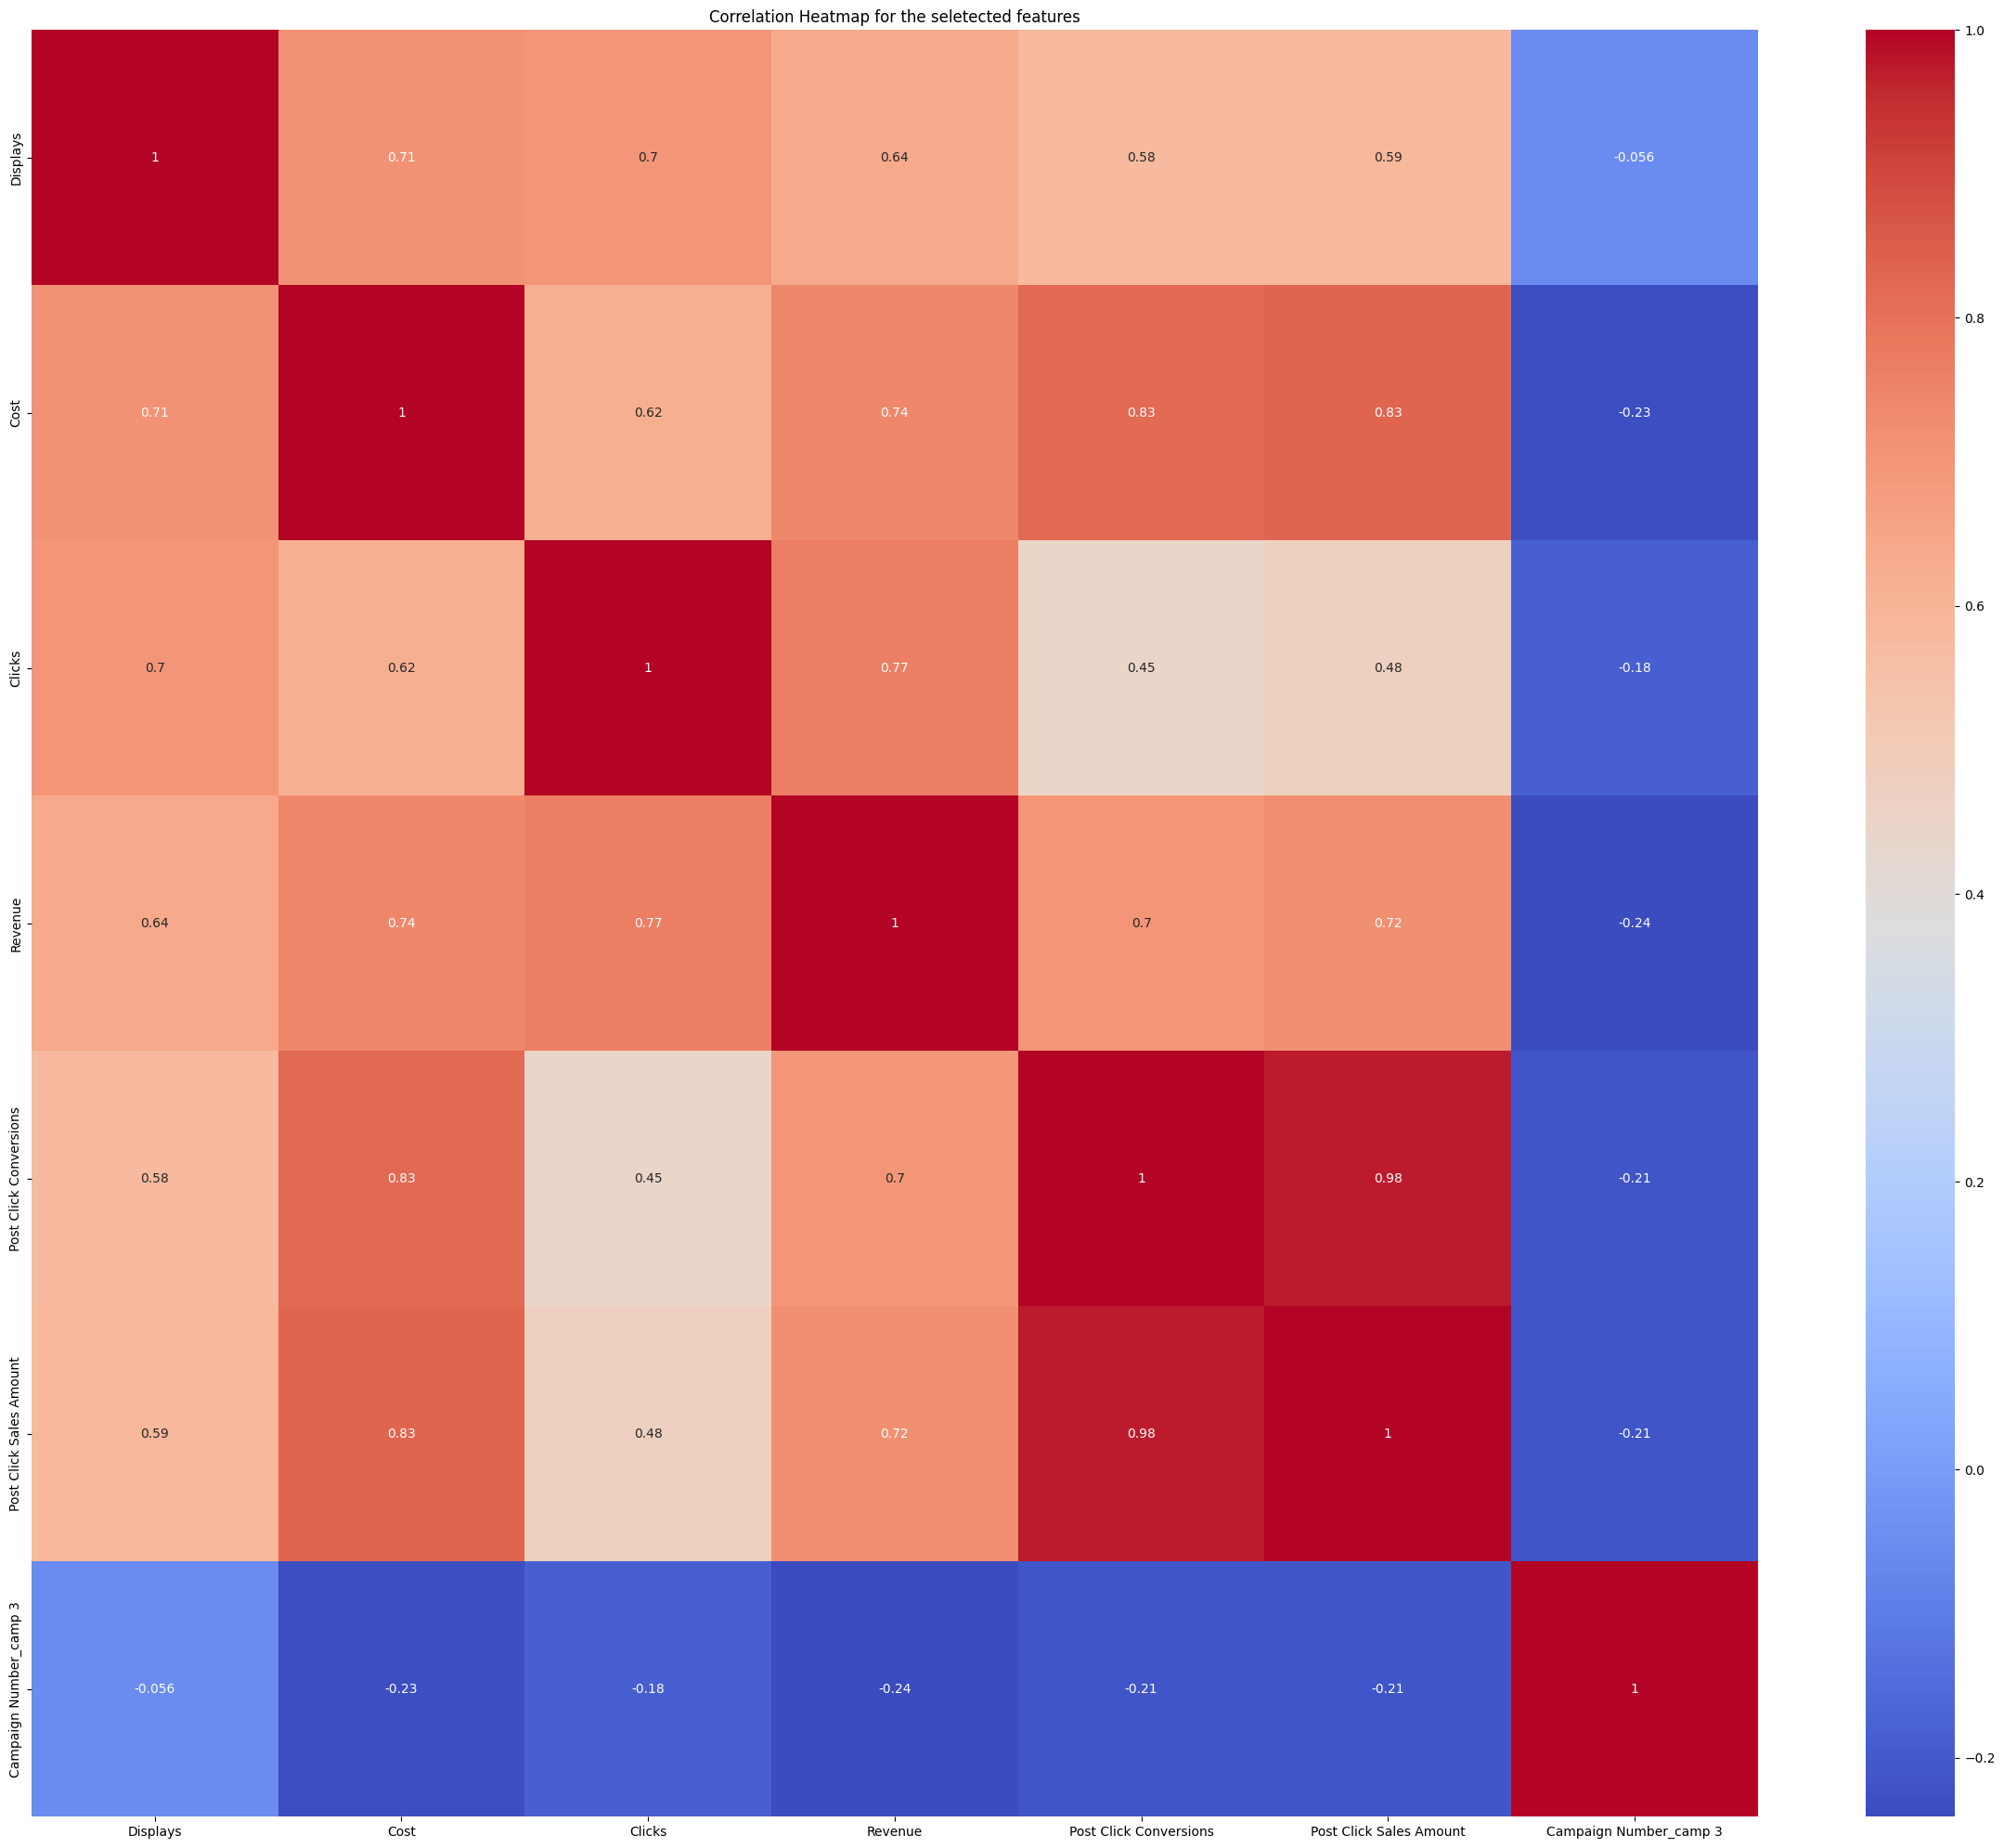

In [17]:
# Create mini correlation matrix

mini_corr_matrix = data_no_outliers[feature_names].corr()



# Generate the heatmap

plt.figure(figsize=(30, 25))

sns.heatmap(mini_corr_matrix, annot = True, cmap="coolwarm")

plt.title("Correlation Heatmap for the seletected features")

plt.show()

# Plot the pairplot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

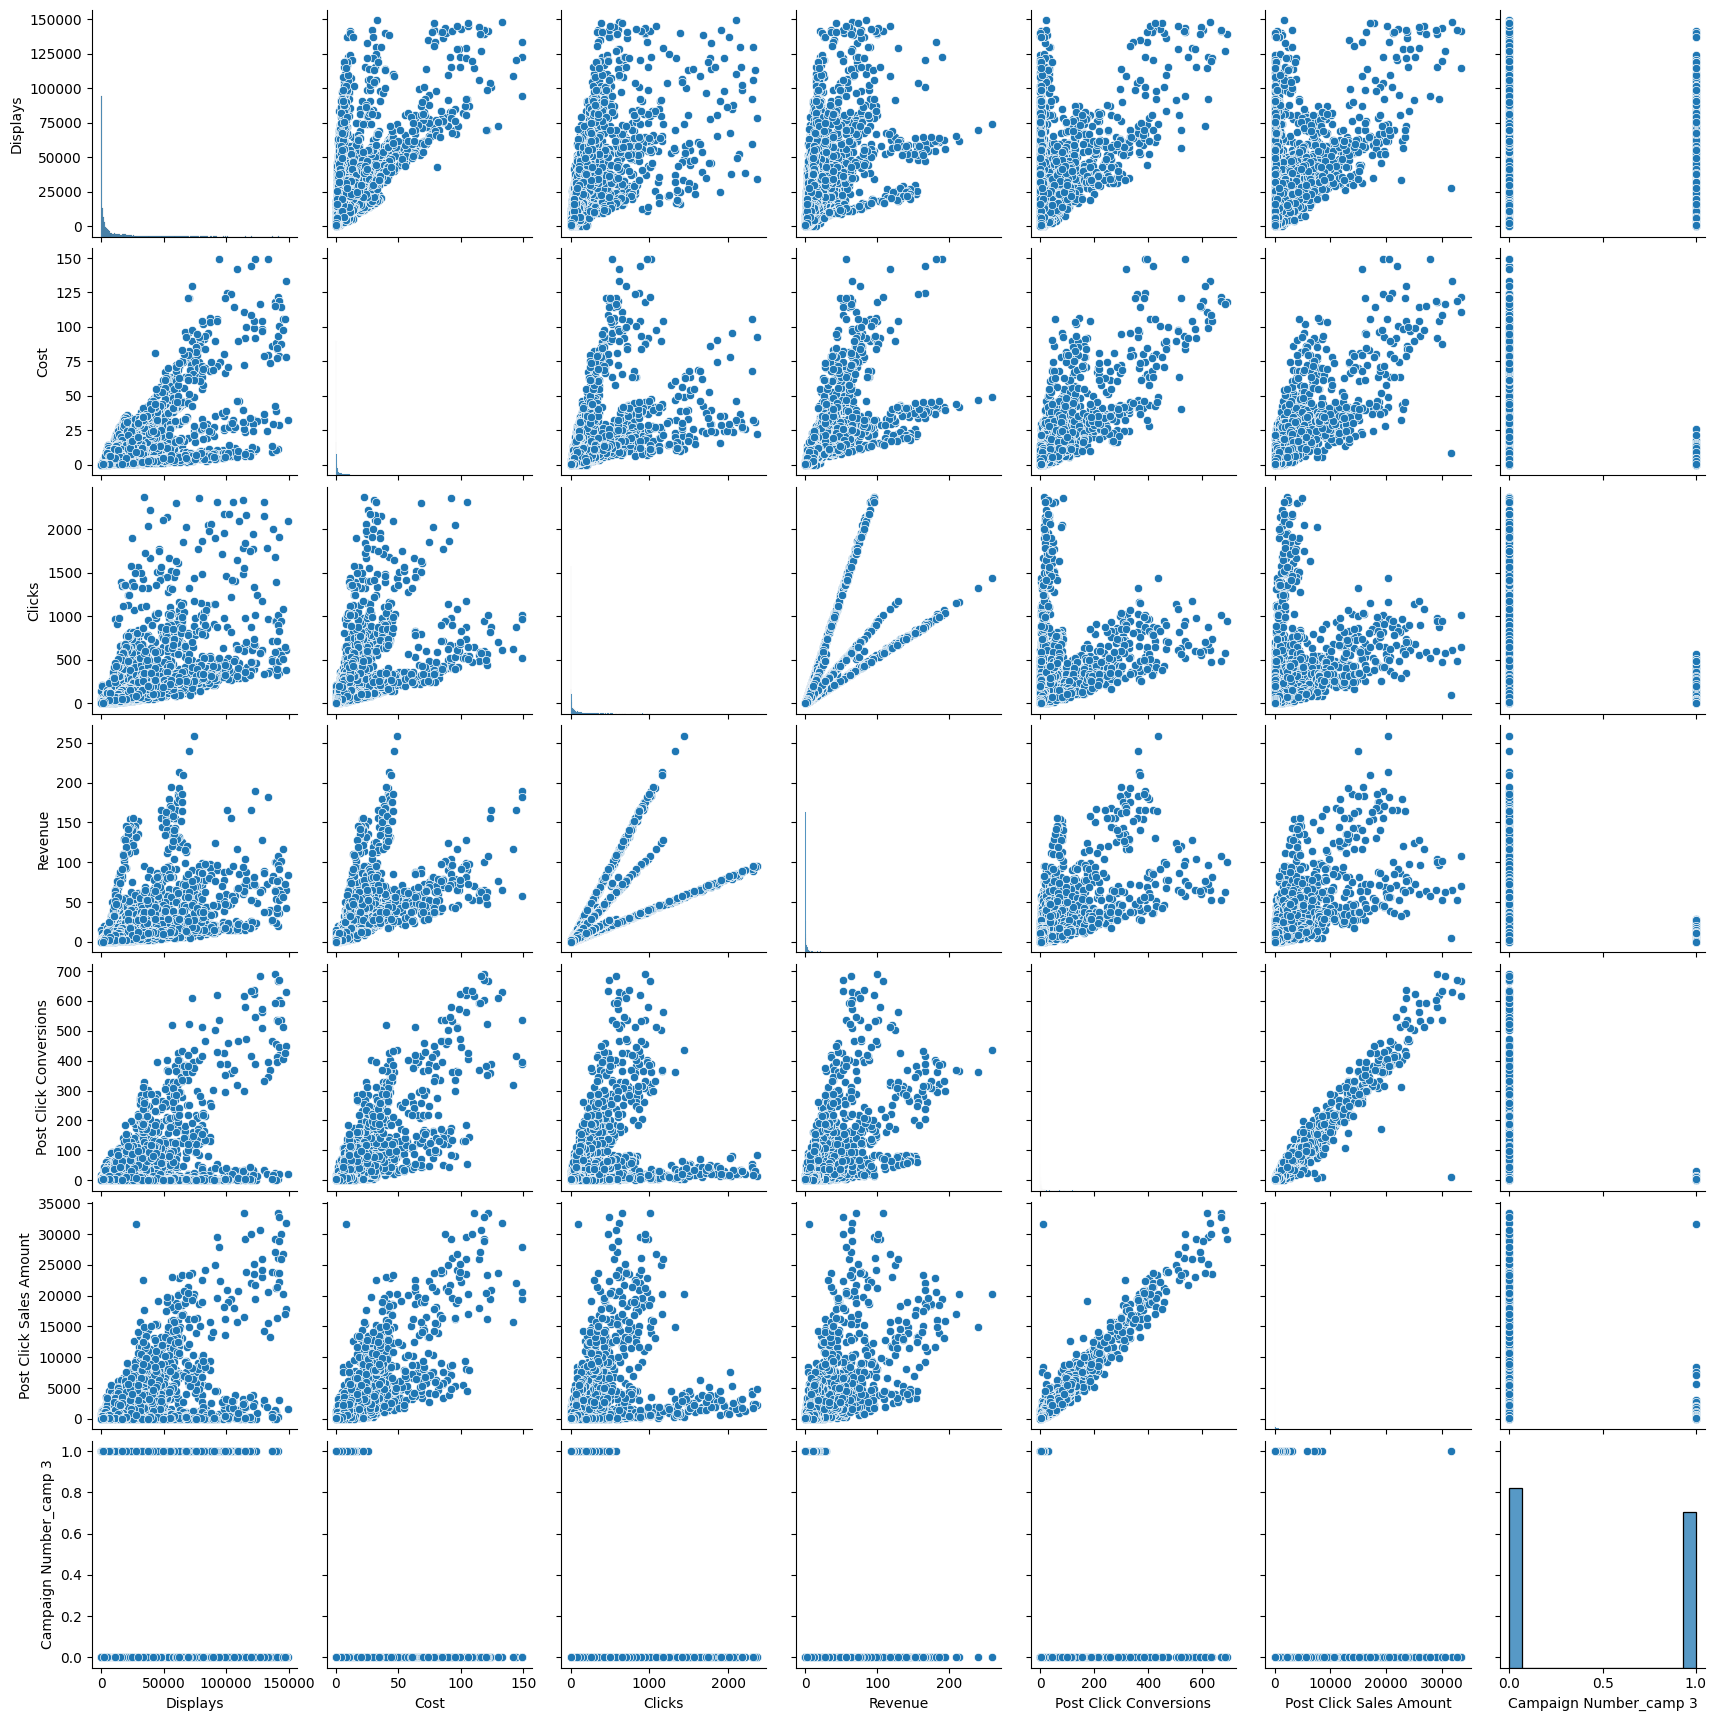

In [18]:
sns.pairplot(data_no_outliers[feature_names])

plt.show()

From the above pairplot, the independent variables "Post Click Conversions" and "Post Click Sales Amount" are linearly dependent. So, "Post Click Conversions" is removed from the list of independent variables.

# Independent Variables:

1. Displays

2. Clicks

3. Cost

4. Post Click Sales Amount



# Target Variables:

1. Revenue


# Observation:

The dataset is best suited for Supervised Machine Learning tasks, particularly Regression, to optimize ad spend and improve marketing yield.

In [19]:
independent_variables=['Cost','Clicks','Post Click Conversions','Post Click Sales Amount']

# Train the model using Random Forest Regressor

In [20]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor





# Separate features (X) and target variable (y)

X = data_no_outliers[independent_variables]

y = data_no_outliers['Revenue']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Split data into training and testing sets



print(f"X_train.shape: {X_train.shape}")

print(f"y_train.shape: {y_train.shape}")



# Train the Random Forest model

rf_regression = RandomForestRegressor(n_estimators=100,random_state=42)

rf_regression.fit(X_train, y_train)


X_train.shape: (8766, 4)
y_train.shape: (8766,)


RandomForestRegressor(random_state=42)

# Evaluate the model

In [21]:
from sklearn.metrics import mean_absolute_error, r2_score



y_train_pred = rf_regression.predict(X_train)

r2_train = r2_score(y_train, y_train_pred) # R-squared for Training Data



y_pred = rf_regression.predict(X_test) # Make predictions

mae = mean_absolute_error(y_test, y_pred) # Evaluate the model

r2 = r2_score(y_test, y_pred) # R-squared for Test Data



print(f"Mean Absolute Error: {mae}")

print(f"R-squared (Training): {r2_train}")

print(f"R-squared (Testing): {r2}")

Mean Absolute Error: 0.8933952907439309
R-squared (Training): 0.9957503865118934
R-squared (Testing): 0.9711543240000359


# Feature Engineering: Validate the feature importance.

In [22]:
importances = rf_regression.feature_importances_

sorted(zip(X.columns, importances), key=lambda x: -x[1])


[('Clicks', 0.5048238118118599),
 ('Cost', 0.35350093614440553),
 ('Post Click Conversions', 0.12268745289607128),
 ('Post Click Sales Amount', 0.018987799147663312)]

# Cross Validation with the trained (Random Forest Regressor) model

In [23]:
from sklearn.model_selection import KFold



rf = RandomForestRegressor(n_estimators=100, random_state=42)

kf = KFold(n_splits=10, shuffle=True, random_state=42) # Define K-Fold cross-validation

r2_scores = [] # Initialize list to store R² scores for each fold



for train_index, test_index in kf.split(X, y): # Iterate through each fold

    X_train, X_test = X.iloc[train_index], X.iloc[test_index] # Split data into training and testing sets

    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # Split data into training and testing sets

    rf.fit(X_train, y_train)     # Train the model on the training data

    y_pred = rf.predict(X_test) # Predict on the testing data

    r2 = r2_score(y_test, y_pred) # Calculate R² score for this fold

    r2_scores.append(r2)



print(f"R² Scores per fold: {r2_scores}")

print(f"Mean R²: {np.mean(r2_scores)}") # Indicates the average performance of the model across all folds

print(f"Standard Deviation of R²: {np.std(r2_scores)}") #Reflects the variability of the model's performance. A smaller value suggests consistent performance. This value is improved after removing the outliers.


R² Scores per fold: [0.9697676162377887, 0.9703119224551678, 0.9747949950667577, 0.9751499264935909, 0.9770490754287195, 0.9801163223089463, 0.9539559319626377, 0.9833448369593836, 0.9588276243894182, 0.9846704910031105]
Mean R²: 0.972798874230552
Standard Deviation of R²: 0.009481031410140379


# Cross-Validation Visualization:


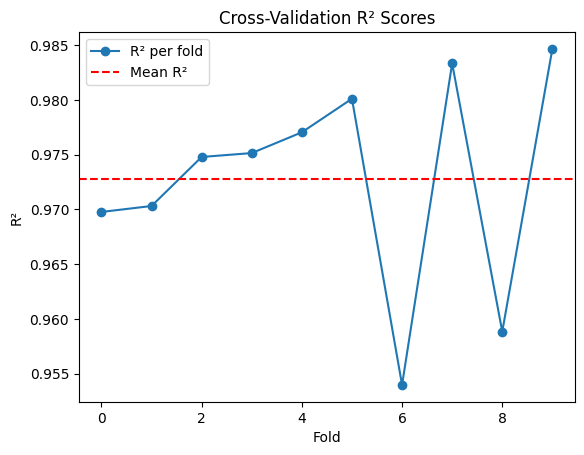

In [24]:


plt.plot(r2_scores, marker='o', label="R² per fold")

plt.axhline(y=np.mean(r2_scores), color='r', linestyle='--', label="Mean R²")

plt.title("Cross-Validation R² Scores")

plt.xlabel("Fold")

plt.ylabel("R²")

plt.legend()

plt.show()


In [25]:
from sklearn.model_selection import GridSearchCV



rf = RandomForestRegressor(random_state=42)

param_grid = { # Define hyperparameters to tune

    'n_estimators': [50, 100, 200],            # Number of trees in the forest

    'max_depth': [None, 10, 20, 30],           # Maximum depth of the tree

    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node

    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required at a leaf node

    'max_features': ['sqrt', 'log2'], # The number of features to consider for splitting a node

    'bootstrap': [True, False]                 # Whether bootstrap samples are used when building trees

}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error') # Perform GridSearchCV with k-fold cross-validation

grid_search.fit(X_train, y_train) # Fit the model

print("Best Parameters:", grid_search.best_params_) # Best parameters found by GridSearchCV

best_rf = grid_search.best_estimator_ # Best model with optimal parameters

print("Best Model R²:", best_rf.score(X_train, y_train)) # R² score of the best model


Fitting 10 folds for each of 432 candidates, totalling 4320 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators

# Evaluating the Best Model

In [26]:


best_model = grid_search.best_estimator_  # Get the best model from the search

y_pred = best_model.predict(X_test) # Evaluate the model on the test data

from sklearn.metrics import mean_squared_error # Calculate R² or other performance metrics



print(f"R² Score: {r2_score(y_test, y_pred)}")

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")


R² Score: 0.9789399758595702
Mean Squared Error: 7.404729437489534
